<a href="https://colab.research.google.com/github/chonyeagoro/Machine_Learning_Project_4_Final/blob/main/Apple_vs_Tesla_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import tensorflow as tf

In [ ]:
import os
# Find the latest version of spark 3.x  from https://downloads.apache.org/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.5.1'
spark_version = 'spark-3.5.1'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3"

# Start a SparkSession
import findspark
findspark.init()

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done


In [ ]:
df = pd.read_csv('/content/Stock_Market_Dataset.csv')
df

In [ ]:
df.rename(columns={'Unnamed: 0': 'Index'}, inplace = True)
df

In [ ]:
df.columns

In [ ]:
df.drop(['Natural_Gas_Price', 'Natural_Gas_Vol.',
       'Crude_oil_Price', 'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.',
       'Bitcoin_Price', 'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.',
       'Ethereum_Price', 'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price',
       'Nasdaq_100_Vol.','Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price',
       'Silver_Vol.', 'Google_Price', 'Google_Vol.', 'Nvidia_Price',
       'Nvidia_Vol.', 'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price',
       'Netflix_Vol.', 'Amazon_Price', 'Amazon_Vol.', 'Meta_Price',
       'Meta_Vol.', 'Gold_Price', 'Gold_Vol.'], axis=1, inplace=True)
df

In [ ]:
df['Date'] = df['Date'].str.replace('/', '-')
df

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%Y')
df

In [ ]:
# Check Data to make sure that the data set does not have any Null values
null_values = df.isnull().sum()
# Print the Values
print("Null values count for each column:")
print(null_values)

In [ ]:
df.dropna(inplace=True)
null_values = df.isnull().sum()
print("Number of null values: ")
print(null_values)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df_grouped = df.groupby('Year').mean().reset_index()
df_grouped

,Year,Index,Date,Apple_Price,Apple_Vol.,Tesla_Price,Tesla_Vol.
0,2019,1127.5,2019-07-18 06:34:26.086956544,53.344348,1.082951e+08,17.950391,1.391627e+08
1,2020,888.0,2020-07-01 19:16:37.590361344,95.263815,1.580562e+08,96.405984,2.261656e+08
2,2021,640.5,2021-07-04 04:29:16.097561088,141.010081,9.069122e+07,259.890935,8.275760e+07
3,2022,395.0,2022-07-03 18:07:20.816326656,154.892571,8.795837e+07,262.945918,8.698180e+07
4,2023,147.5,2023-07-02 09:18:43.200000000,172.548920,5.846768e+07,217.475240,1.370767e+08
5,2024,11.0,2024-01-17 18:46:57.391304448,187.605217,5.798696e+07,213.717826,1.097287e+08


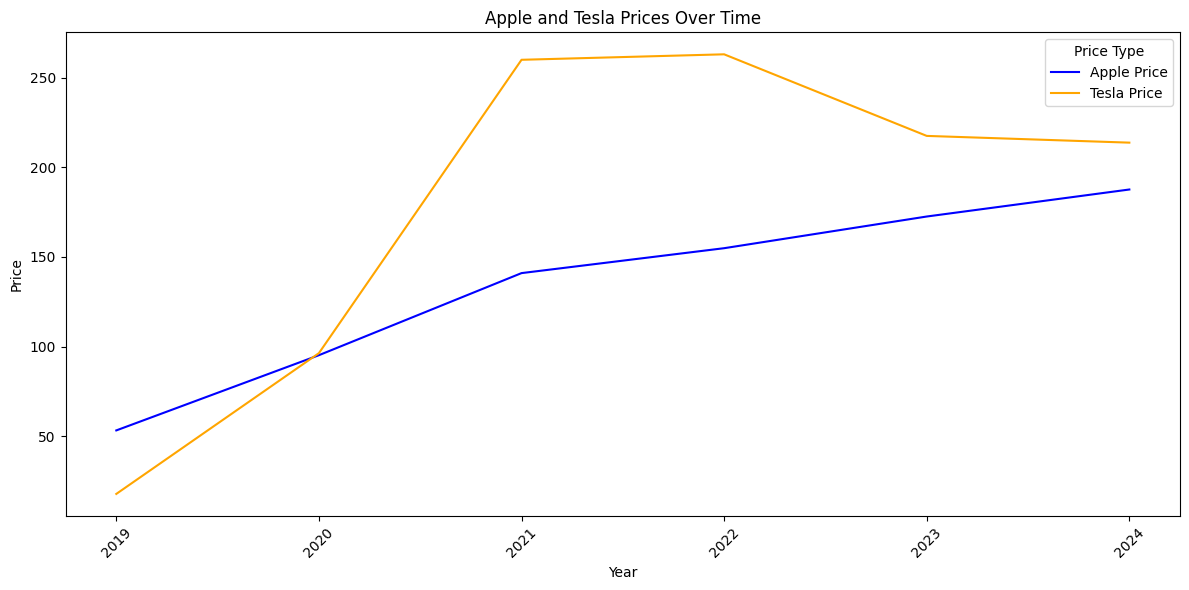

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(df_grouped['Year'], df_grouped['Apple_Price'], label='Apple Price', color='blue')
plt.plot(df_grouped['Year'], df_grouped['Tesla_Price'], label='Tesla Price', color='orange')
plt.title('Apple and Tesla Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(title='Price Type')
plt.tight_layout()
plt.show()

In [ ]:
# Step 4: Calculate the correlation coefficient
apple_corr = df['Apple_Vol.'].corr(df['Apple_Price'])
tesla_corr = df['Tesla_Vol.'].corr(df['Tesla_Price'])
print("Correlation between Apple Volume and Apple Price:", apple_corr)
print("Correlation between Tesla Volume and Tesla Price:", tesla_corr)

Correlation between Apple Volume and Apple Price: -0.46876330831957586
Correlation between Tesla Volume and Tesla Price: -0.447560875507868


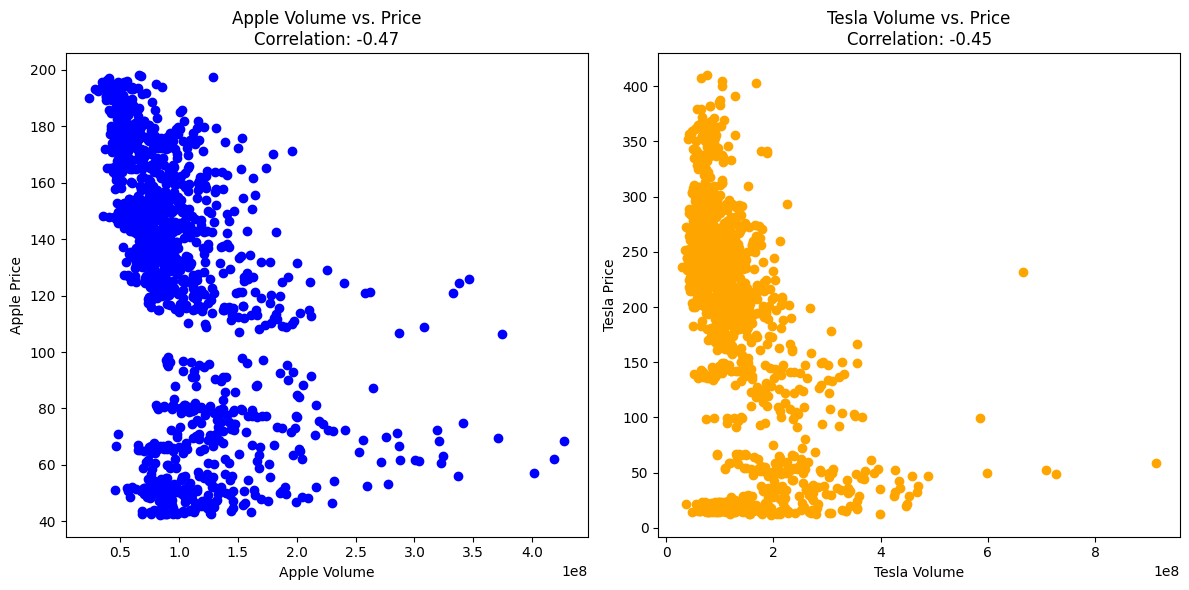

In [ ]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['Apple_Vol.'], df['Apple_Price'], color='blue')
plt.title(f'Apple Volume vs. Price\nCorrelation: {apple_corr:.2f}')
plt.xlabel('Apple Volume')
plt.ylabel('Apple Price')

plt.subplot(1, 2, 2)
plt.scatter(df['Tesla_Vol.'], df['Tesla_Price'], color='orange')
plt.title(f'Tesla Volume vs. Price\nCorrelation: {tesla_corr:.2f}')
plt.xlabel('Tesla Volume')
plt.ylabel('Tesla Price')

plt.tight_layout()
plt.show()

8/8 [==============================] - 0s 4ms/step
Apple Price Predictions:
Linear Regression MSE: 1.5029575077105792
Random Forest MSE: 2.1045634157660995
LSTM MSE: 63.24198511516476

Tesla Price Predictions:
Linear Regression MSE: 14.24757279274447
Random Forest MSE: 21.19301954258056
LSTM MSE: 173.31280749553204


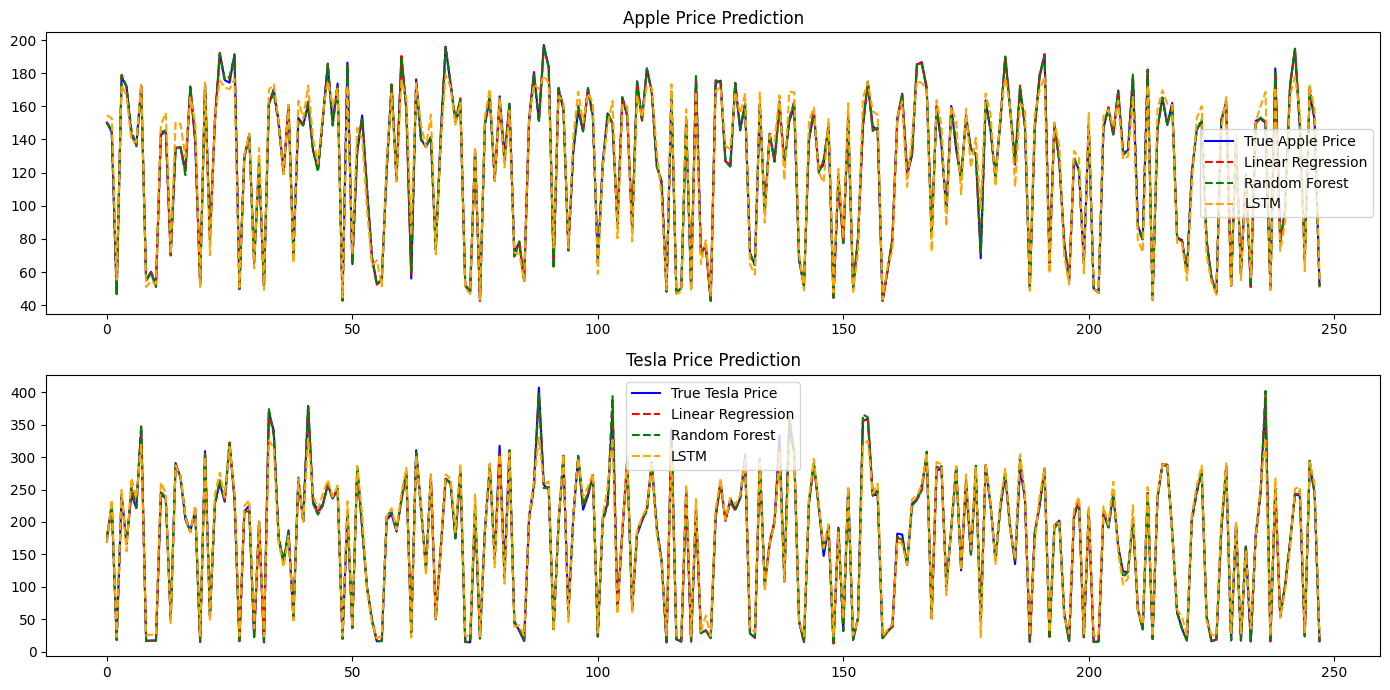

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Add technical indicators (e.g., moving averages)
df['Apple_MA'] = df['Apple_Price'].rolling(window=2).mean()
df['Tesla_MA'] = df['Tesla_Price'].rolling(window=2).mean()

# Drop NaN values created by moving average
df.dropna(inplace=True)

# Features and target
features = ['Apple_Vol.', 'Apple_MA', 'Tesla_Vol.', 'Tesla_MA']
target_apple = 'Apple_Price'
target_tesla = 'Tesla_Price'

# Split the data
X = df[features]
y_apple = df[target_apple]
y_tesla = df[target_tesla]

X_train, X_test, y_apple_train, y_apple_test, y_tesla_train, y_tesla_test = train_test_split(X, y_apple, y_tesla, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_apple_train)
y_apple_pred_lr = lr_model.predict(X_test_scaled)
lr_model.fit(X_train_scaled, y_tesla_train)
y_tesla_pred_lr = lr_model.predict(X_test_scaled)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_apple_train)
y_apple_pred_rf = rf_model.predict(X_test_scaled)
rf_model.fit(X_train_scaled, y_tesla_train)
y_tesla_pred_rf = rf_model.predict(X_test_scaled)

#LSTM
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(1, X_train_scaled.shape[1])))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm, y_apple_train, batch_size=1, epochs=1)
y_apple_pred_lstm = lstm_model.predict(X_test_lstm)

lstm_model.fit(X_train_lstm, y_tesla_train, batch_size=1, epochs=1)
y_tesla_pred_lstm = lstm_model.predict(X_test_lstm)

# Evaluate models
print("Apple Price Predictions:")
print(f"Linear Regression MSE: {mean_squared_error(y_apple_test, y_apple_pred_lr)}")
print(f"Random Forest MSE: {mean_squared_error(y_apple_test, y_apple_pred_rf)}")
print(f"LSTM MSE: {mean_squared_error(y_apple_test, y_apple_pred_lstm)}")

print("\nTesla Price Predictions:")
print(f"Linear Regression MSE: {mean_squared_error(y_tesla_test, y_tesla_pred_lr)}")
print(f"Random Forest MSE: {mean_squared_error(y_tesla_test, y_tesla_pred_rf)}")
print(f"LSTM MSE: {mean_squared_error(y_tesla_test, y_tesla_pred_lstm)}")

# Visualization
plt.figure(figsize=(14, 7))

# Apple Predictions
plt.subplot(2, 1, 1)
plt.plot(y_apple_test.values, label='True Apple Price', color='blue')
plt.plot(y_apple_pred_lr, label='Linear Regression', linestyle='dashed', color='red')
plt.plot(y_apple_pred_rf, label='Random Forest', linestyle='dashed', color='green')
plt.plot(y_apple_pred_lstm, label='LSTM', linestyle='dashed', color='orange')
plt.title('Apple Price Prediction')
plt.legend()

# Tesla Predictions
plt.subplot(2, 1, 2)
plt.plot(y_tesla_test.values, label='True Tesla Price', color='blue')
plt.plot(y_tesla_pred_lr, label='Linear Regression', linestyle='dashed', color='red')
plt.plot(y_tesla_pred_rf, label='Random Forest', linestyle='dashed', color='green')
plt.plot(y_tesla_pred_lstm, label='LSTM', linestyle='dashed', color='orange')
plt.title('Tesla Price Prediction')
plt.legend(loc = 'upper center')

plt.tight_layout()
plt.show()

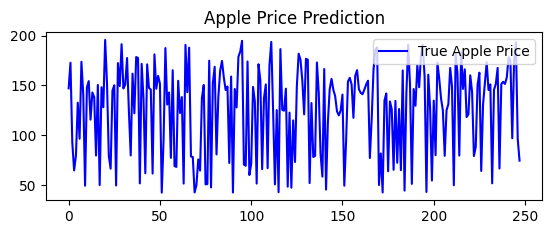

In [59]:
plt.subplot(2, 1, 1)
plt.plot(y_apple_test.values, label='True Apple Price', color='blue')
plt.title('Apple Price Prediction')
plt.legend(loc = 'upper right')

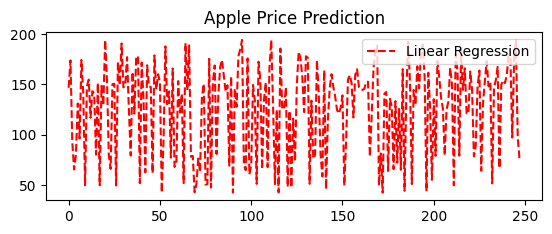

In [60]:
plt.subplot(2, 1, 1)
plt.plot(y_apple_pred_lr, label='Linear Regression', linestyle='dashed', color='red')
plt.title('Apple Price Prediction')
plt.legend(loc = 'upper right')

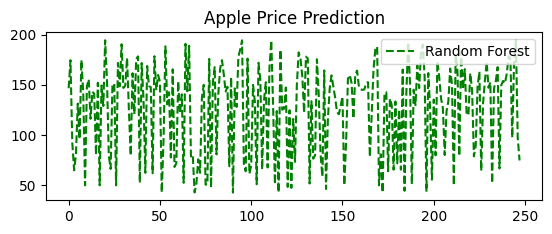

In [61]:
plt.subplot(2, 1, 1)
plt.plot(y_apple_pred_rf, label='Random Forest', linestyle='dashed', color='green')
plt.title('Apple Price Prediction')
plt.legend(loc = 'upper right')

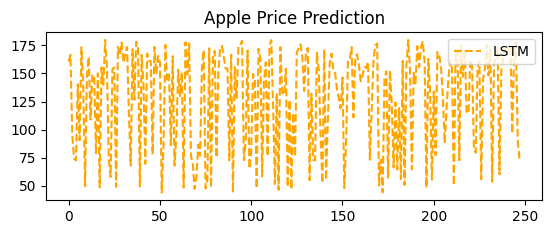

In [62]:
plt.subplot(2, 1, 1)
plt.plot(y_apple_pred_lstm, label='LSTM', linestyle='dashed', color='orange')
plt.title('Apple Price Prediction')
plt.legend(loc = 'upper right')

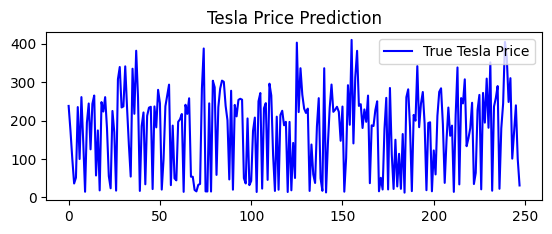

In [63]:
plt.subplot(2, 1, 2)
plt.plot(y_tesla_test.values, label='True Tesla Price', color='blue')
plt.title('Tesla Price Prediction')
plt.legend(loc = 'upper right')


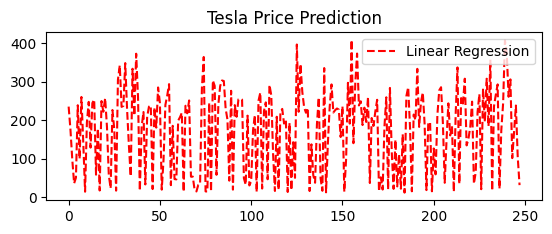

In [64]:
plt.subplot(2, 1, 2)
plt.plot(y_tesla_pred_lr, label='Linear Regression', linestyle='dashed', color='red')
plt.title('Tesla Price Prediction')
plt.legend(loc = 'upper right')

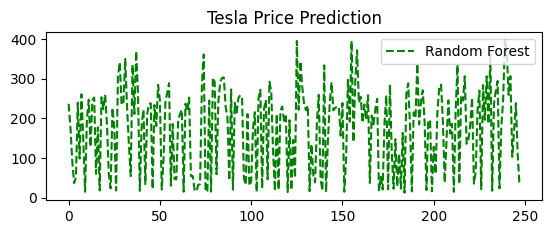

In [65]:
plt.subplot(2, 1, 1)
plt.plot(y_tesla_pred_rf, label='Random Forest', linestyle='dashed', color='green')
plt.title('Tesla Price Prediction')
plt.legend(loc = 'upper right')



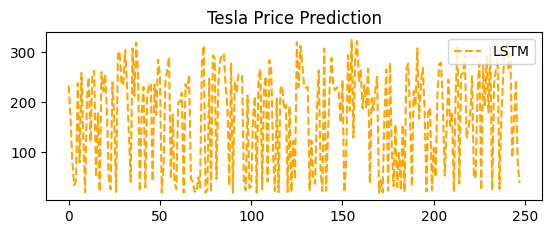

In [67]:
plt.subplot(2, 1, 1)
plt.plot(y_tesla_pred_lstm, label='LSTM', linestyle='dashed', color='orange')
plt.title('Tesla Price Prediction')
plt.legend(loc = 'upper right')